--- LinearRegression ---
train: 0.8710525685992707
test: 0.7854929935582584
--- Ridge ---
train: 0.8483263899180145
test: 0.8528754801497631
--- Lasso ---
train: 0.8224680202036665
test: 0.858846785318774
['RM' 'PTRATIO' 'LSTAT'] <class 'numpy.ndarray'>
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2'] <class 'numpy.ndarray'>
       Weight 1  Weight 2  Weight 3
x0     0.386422  0.337682  0.409426
x1    -0.152872 -0.170195 -0.083104
x2    -0.551885 -0.349394 -0.287714
x0^2   0.131727  0.118870  0.150001
x0 x1 -0.020162 -0.071353 -0.000000
x0 x2 -0.075246 -0.085097 -0.037450
x1^2  -0.064391 -0.056971 -0.000000
x1 x2 -0.021389 -0.010057  0.000000
x2^2   0.152580  0.046435  0.000000 
 Weight 1    1.556675
Weight 2    1.246054
Weight 3    0.967696
dtype: float64


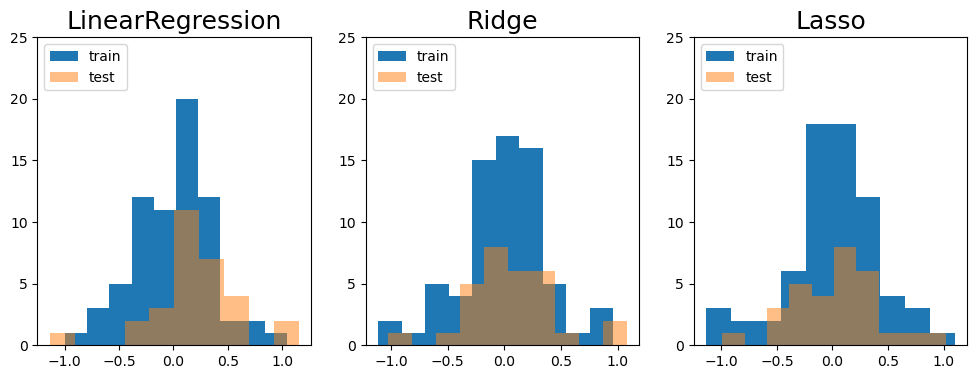

In [32]:
# code11-1
# 絶対使うであろうモジュールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# def print_weight(weight):
#     print(pd.Series(weight, index = pf.get_feature_names_out()))

# code11-2
df = pd.read_csv('../datafiles/Boston.csv') # csvの読み込み
df = df.fillna(df.mean(numeric_only=True)) # 欠損値補完
df = df.drop([76], axis = 0) # 外れ値の行を削除
 
t = df[['PRICE']] # 正解データ抜き出し
x = df.loc[:,['RM', 'PTRATIO', 'LSTAT']] # 特徴量抜き出し
 
# 標準化
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc2 = StandardScaler()
sc_t = sc2.fit_transform(t)
 
# 2乗列と交互作用項の追加
pf = PolynomialFeatures(degree = 2, include_bias = False)
pf_x = pf.fit_transform(sc_x) 

# print(pd.Series(pf_x[0], index=pf.get_feature_names_out()))


x_train, x_test, y_train, y_test = train_test_split(pf_x,
    sc_t, test_size = 0.3, random_state = 0)
 
# LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print("--- LinearRegression ---")
print("train:", model.score(x_train, y_train)) # 訓練データの決定係数
print("test:", model.score(x_test, y_test)) # テストデータの決定係数

weight1 = model.coef_[0]
 
fig = plt.figure(figsize=(12,4))
 
# 訓練データの誤差ヒストグラム
pred = model.predict(x_train)
ax = fig.add_subplot(131)
ax.set_title("LinearRegression", size = 18)
ax.set_ylim(0, 25)
ax.hist(pred - y_train, label='train')
 
# テストデータの誤差ヒストグラム
pred = model.predict(x_test)
ax.hist(pred - y_test, alpha=0.5, label='test')
ax.legend(loc='upper left')
 
# Ridge
from sklearn.linear_model import Ridge # モジュールインポート
ridgeModel = Ridge(alpha = 17.62)
ridgeModel.fit(x_train, y_train)
print("--- Ridge ---")
print("train:", ridgeModel.score(x_train, y_train)) # 訓練データの決定係数
print("test:", ridgeModel.score(x_test, y_test)) # テストデータの決定係数

weight2=ridgeModel.coef_[0]

# 訓練データの誤差ヒストグラム
pred = ridgeModel.predict(x_train)
ax = fig.add_subplot(132)
ax.set_title("Ridge", size = 18)
ax.set_ylim(0, 25)
ax.hist(pred - y_train, label='train')
 
# テストデータの誤差ヒストグラム
pred = ridgeModel.predict(x_test)
ax.hist(pred - y_test, alpha=0.5, label='test')
ax.legend(loc='upper left')
 
# Lasso
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.1)
model.fit(x_train, y_train)
print("--- Lasso ---")
print("train:", model.score(x_train, y_train)) # 訓練データの決定係数
print("test:", model.score(x_test, y_test)) # テストデータの決定係数

weight3=model.coef_

print(x.columns.to_numpy(),type(x.columns.to_numpy()))
print(pf.get_feature_names_out(),type(pf.get_feature_names_out()))
index=pf.get_feature_names_out()
# 重みと特徴名をDataFrameにまとめて表示
# index = np.concatenate((x.columns.to_numpy(),pf.get_feature_names_out()))
# print(index)
# print(pd.DataFrame({'Weight 1': pd.Series(weight1, index=pf.get_feature_names_out()),
#                     'Weight 2': pd.Series(weight2, index=pf.get_feature_names_out()),
#                     'Weight 3': pd.Series(weight3, index=pf.get_feature_names_out())})
# )
ret = pd.DataFrame({'Weight 1': pd.Series(weight1, index=index),
                    'Weight 2': pd.Series(weight2, index=index),
                    'Weight 3': pd.Series(weight3, index=index)})
print(ret,"\n",ret.abs().sum())

# 訓練データの誤差ヒストグラム
pred = model.predict(x_train)
ax = fig.add_subplot(133)
ax.set_title("Lasso", size = 18)
ax.set_ylim(0, 25)
ax.hist(pred.reshape(-1,1) - y_train, label='train')
 
# テストデータの誤差ヒストグラム
pred = model.predict(x_test) #上のpredとshapeが異なる
ax.hist(pred.reshape(-1,1) - y_test, alpha=0.5, label='test')
ax.legend(loc='upper left')
plt.show()
 
# 更新2023-07-14


--- LinearRegression ---
train: 0.8710525685992707
test: 0.7854929935582586
--- Ridge ---
train: 0.8614119701300951
test: 0.8455685544927758
--- Lasso ---
train: 0.8224688319425975
test: 0.8588453785828218
         Weight 1  Weight 2  Weight 3
RM       0.193211  0.183407  0.404728
PTRATIO -0.076436 -0.085425 -0.083097
LSTAT   -0.275943 -0.204998 -0.286488
x0       0.193211  0.183407  0.004672
x1      -0.076436 -0.085425 -0.000000
x2      -0.275943 -0.204998 -0.001251
x0^2     0.131727  0.122954  0.149996
x0 x1   -0.020162 -0.052023 -0.000000
x0 x2   -0.075246 -0.075336 -0.037467
x1^2    -0.064391 -0.059160 -0.000000
x1 x2   -0.021389 -0.011394  0.000000
x2^2     0.152580  0.076477  0.000000 
 Weight 1    1.556675
Weight 2    1.345005
Weight 3    0.967700
dtype: float64


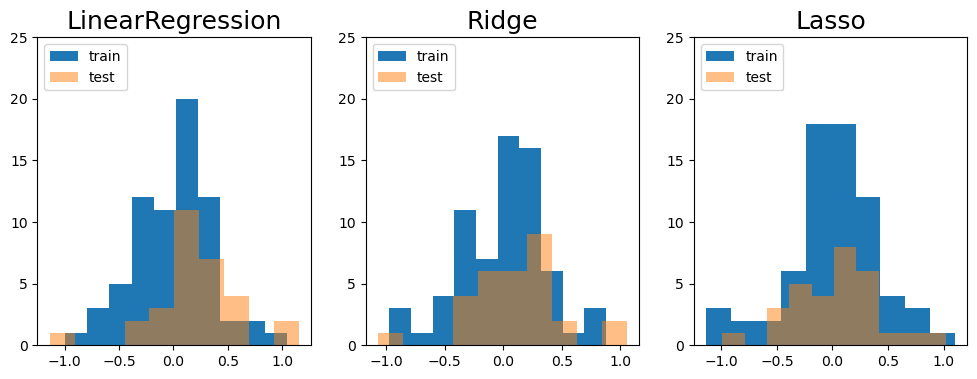

In [31]:
# code11-1
# 絶対使うであろうモジュールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# def print_weight(weight):
#     print(pd.Series(weight, index = pf.get_feature_names_out()))

# code11-2
df = pd.read_csv('../datafiles/Boston.csv') # csvの読み込み
df = df.fillna(df.mean(numeric_only=True)) # 欠損値補完
df = df.drop([76], axis = 0) # 外れ値の行を削除
 
t = df[['PRICE']] # 正解データ抜き出し
x = df.loc[:,['RM', 'PTRATIO', 'LSTAT']] # 特徴量抜き出し

# 標準化
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc2 = StandardScaler()
sc_t = sc2.fit_transform(t)
 
# 2乗列と交互作用項の追加
pf = PolynomialFeatures(degree = 2, include_bias = False)
pf_x = pf.fit_transform(sc_x) 

#元の値も追加#------#---------#---------#---------#---------#---------#-
# print(type(sc_x),type(pf_x))
index_x = np.array(['RM', 'PTRATIO', 'LSTAT',])
pf_x = np.concatenate((sc_x, pf_x), axis=1)
# print(pf_x[0])
# print(type(index_x),type(pf.get_feature_names_out()))
index=np.concatenate((index_x,pf.get_feature_names_out()))
# print(index)
# print(pd.Series(pf_x[0], index=index))
#---------#---------#---------#---------#---------#---------#---------#-

x_train, x_test, y_train, y_test = train_test_split(pf_x,
    sc_t, test_size = 0.3, random_state = 0)
 
# LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print("--- LinearRegression ---")
print("train:", model.score(x_train, y_train)) # 訓練データの決定係数
print("test:", model.score(x_test, y_test)) # テストデータの決定係数

weight1 = model.coef_[0]
 
fig = plt.figure(figsize=(12,4))
 
# 訓練データの誤差ヒストグラム
pred = model.predict(x_train)
ax = fig.add_subplot(131)
ax.set_title("LinearRegression", size = 18)
ax.set_ylim(0, 25)
ax.hist(pred - y_train, label='train')
 
# テストデータの誤差ヒストグラム
pred = model.predict(x_test)
ax.hist(pred - y_test, alpha=0.5, label='test')
ax.legend(loc='upper left')
 
# Ridge
from sklearn.linear_model import Ridge # モジュールインポート
ridgeModel = Ridge(alpha = 17.62)
ridgeModel.fit(x_train, y_train)
print("--- Ridge ---")
print("train:", ridgeModel.score(x_train, y_train)) # 訓練データの決定係数
print("test:", ridgeModel.score(x_test, y_test)) # テストデータの決定係数

weight2=ridgeModel.coef_[0]

# 訓練データの誤差ヒストグラム
pred = ridgeModel.predict(x_train)
ax = fig.add_subplot(132)
ax.set_title("Ridge", size = 18)
ax.set_ylim(0, 25)
ax.hist(pred - y_train, label='train')
 
# テストデータの誤差ヒストグラム
pred = ridgeModel.predict(x_test)
ax.hist(pred - y_test, alpha=0.5, label='test')
ax.legend(loc='upper left')
 
# Lasso
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.1)
model.fit(x_train, y_train)
print("--- Lasso ---")
print("train:", model.score(x_train, y_train)) # 訓練データの決定係数
print("test:", model.score(x_test, y_test)) # テストデータの決定係数

weight3=model.coef_

# print(x.columns.to_numpy(),type(x.columns.to_numpy()))
# print(pf.get_feature_names_out(),type(pf.get_feature_names_out()))
# index=pf.get_feature_names_out()
# 重みと特徴名をDataFrameにまとめて表示
# index = np.concatenate((x.columns.to_numpy(),pf.get_feature_names_out()))
# print(index)
# print(pd.DataFrame({'Weight 1': pd.Series(weight1, index=pf.get_feature_names_out()),
#                     'Weight 2': pd.Series(weight2, index=pf.get_feature_names_out()),
#                     'Weight 3': pd.Series(weight3, index=pf.get_feature_names_out())})
# )
ret = pd.DataFrame({'Weight 1': pd.Series(weight1, index=index),
                    'Weight 2': pd.Series(weight2, index=index),
                    'Weight 3': pd.Series(weight3, index=index)})
print(ret,"\n",ret.abs().sum())

# 訓練データの誤差ヒストグラム
pred = model.predict(x_train)
ax = fig.add_subplot(133)
ax.set_title("Lasso", size = 18)
ax.set_ylim(0, 25)
ax.hist(pred.reshape(-1,1) - y_train, label='train')
 
# テストデータの誤差ヒストグラム
pred = model.predict(x_test) #上のpredとshapeが異なる
ax.hist(pred.reshape(-1,1) - y_test, alpha=0.5, label='test')
ax.legend(loc='upper left')
plt.show()
 
# 更新2023-07-14
